In [2]:
# referência e documentação: https://pythonhosted.org/scikit-fuzzy/api/api.html
# instalar a biblioteca scikit-fuzzy
!pip install scikit-fuzzy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Conceitos Preliminares

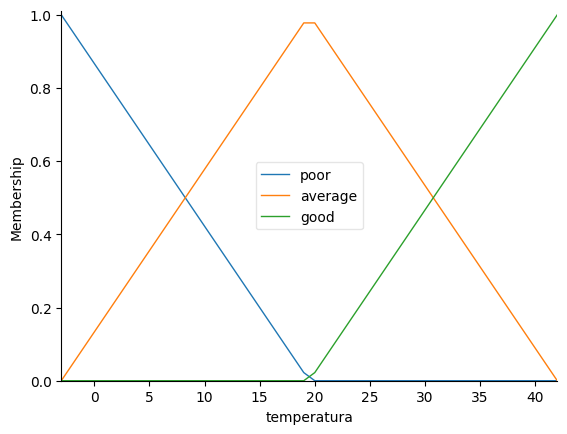

In [4]:
# variavel.automf(n)
# variavel: é o objeto Antecedent ou Consequent (ex: temperatura, umidade).

# n: número de conjuntos fuzzy desejados (tipicamente 3, 5 ou 7).

# Criando a variável fuzzy
temperatura = ctrl.Antecedent(np.arange(-3, 43, 1), 'temperatura')


# Criando automaticamente 3 conjuntos fuzzy: poor, average, good
temperatura.automf(3)

# Criando automaticamente 5 conjuntos fuzzy: poor, mediocre, average, good
#temperatura.automf(5)

# Visualizando os conjuntos
temperatura.view()


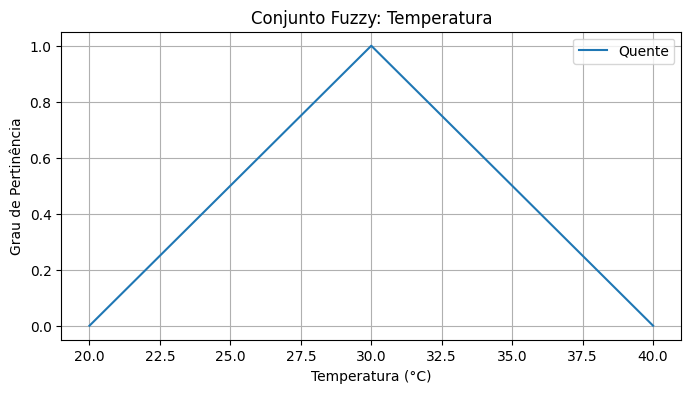

In [5]:

# trimf(x, abc)
# x: é o universo da variável (array com os valores possíveis)

# abc: é uma lista ou tupla com 3 valores que definem a forma do triângulo:
# [a, b, c]

# a: ponto onde a pertinência começa a subir (grau 0)

# b: ponto onde a pertinência é máxima (grau 1)

# c: ponto onde a pertinência volta a 0


# Universo da variável temperatura
temperatura = np.arange(20, 41, 1)

# Função de pertinência triangular
quente = fuzz.trimf(temperatura, [20, 30, 40])

# Plot personalizado
plt.figure(figsize=(8, 4))
plt.plot(temperatura, quente, label='Quente')
plt.title('Conjunto Fuzzy: Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grau de Pertinência')  # <--- Aqui você muda o eixo Y
plt.grid(True)
plt.legend()
plt.show()


# Exemplo Prático 01: Controlar o tempo de irrigação com base na umidade do solo e na temperatura ambiente.

## Variáveis:
### Entradas:

- Umidade do solo (baixa, média, alta)

- Temperatura (baixa, média, alta)

### Saída:

- Tempo de irrigação (curto, médio, longo)


## Interpretação:
- Se a umidade está baixa e a temperatura alta, ele recomenda mais irrigação.

- Se a umidade está alta, independente da temperatura, recomenda menos irrigação.

- O sistema é flexível, baseado em regras fuzzy simples.

Tempo sugerido de irrigação: 6.67 minutos


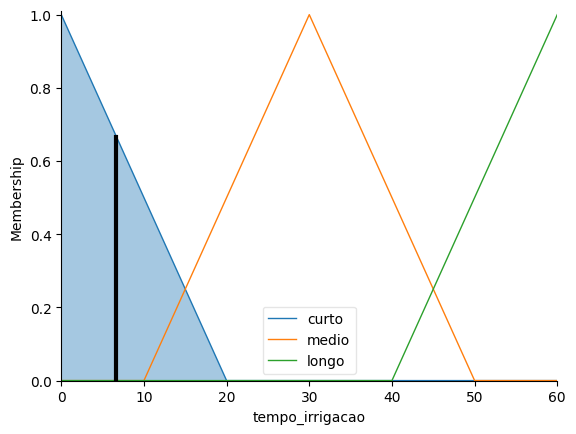

In [ ]:

# 1. Definindo variáveis de entrada e saída
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')  # em %
temperatura = ctrl.Antecedent(np.arange(0, 44, 1), 'temperatura')  # em °C
tempo_irrigacao = ctrl.Consequent(np.arange(0, 61, 1), 'tempo_irrigacao')  # em minutos

# 1.2 Gerando automaticamente os conjuntos fuzzy com 3 termos
umidade.automf(3)  # low, average, high
temperatura.automf(3)

# 1.3 Conjuntos fuzzy da saída definidos manualmente
tempo_irrigacao['curto'] = fuzz.trimf(tempo_irrigacao.universe, [0, 0, 20])
tempo_irrigacao['medio'] = fuzz.trimf(tempo_irrigacao.universe, [10, 30, 50])
tempo_irrigacao['longo'] = fuzz.trimf(tempo_irrigacao.universe, [40, 60, 60])

# 2. Criando regras fuzzy
regra1 = ctrl.Rule(umidade['poor'] & temperatura['good'], tempo_irrigacao['longo'])
regra2 = ctrl.Rule(umidade['average'] & temperatura['average'], tempo_irrigacao['medio'])
regra3 = ctrl.Rule(umidade['good'] | temperatura['poor'], tempo_irrigacao['curto'])

# 3. Sistema de controle
sistema_irrigacao = ctrl.ControlSystem([regra1, regra2, regra3])
simulador = ctrl.ControlSystemSimulation(sistema_irrigacao)

# 4. Entradas do sistema (exemplo)
simulador.input['umidade'] = 100  # Umidade atual em %
simulador.input['temperatura'] = 0  # Temperatura em °C

# 4.1 Executando simulação
simulador.compute()

# 4.2 Resultado
print(f"Tempo sugerido de irrigação: {simulador.output['tempo_irrigacao']:.2f} minutos")
tempo_irrigacao.view(sim=simulador)


# Exemplo Prático 02: Controle de velocidade de um carro com base na distância até o carro da frente e na velocidade atual.


## Variáveis:
### Entradas:
- Distância (baixa, média, alta)

- Velocidade (baixa, média, alta)

### Saída:

- Aceleração (reduzir, manter, aumentar)


## Passos:
1. Definir os conjuntos fuzzy.
2. Criar as regras fuzzy.
3. Aplicar o sistema de inferência.
4. Obter uma saída (valor de aceleração).

Valor de aceleração sugerido: -6.30


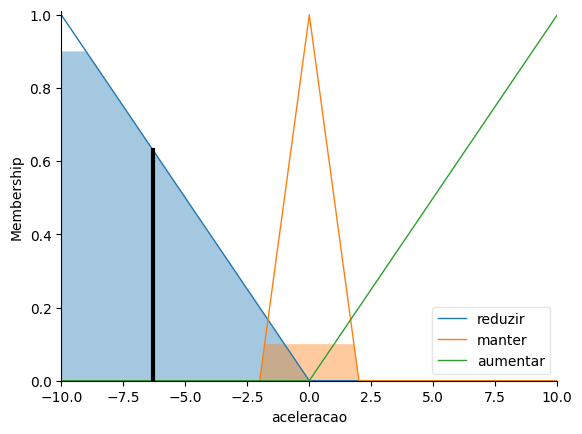

In [ ]:

# 1. Definindo o conjunto de Entrada  e Saída
## 1.1 Definindo as variáveis de entrada e saída
distancia = ctrl.Antecedent(np.arange(0, 101, 1), 'distancia')
velocidade = ctrl.Antecedent(np.arange(0, 121, 1), 'velocidade')
aceleracao = ctrl.Consequent(np.arange(-10, 11, 1), 'aceleracao')

## 1.2 Criando automaticamente 3 conjuntos fuzzy com 3 termos de entrada: poor, average, good
distancia.automf(3)
velocidade.automf(3)

# 1.3 Definindo os conjuntos fuzzy da saída
aceleracao['reduzir'] = fuzz.trimf(aceleracao.universe, [-10, -10, 0])
aceleracao['manter'] = fuzz.trimf(aceleracao.universe, [-2, 0, 2])
aceleracao['aumentar'] = fuzz.trimf(aceleracao.universe, [0, 10, 10])

# 2. Criando regras fuzzy
regra1 = ctrl.Rule(distancia['poor'] | velocidade['good'], aceleracao['reduzir'])
regra2 = ctrl.Rule(distancia['average'], aceleracao['manter'])
regra3 = ctrl.Rule(distancia['good'] & velocidade['poor'], aceleracao['aumentar'])

# 3. Criando o sistema de inferência
controle_aceleracao = ctrl.ControlSystem([regra1, regra2, regra3])
simulador = ctrl.ControlSystemSimulation(controle_aceleracao)

# 4. Executar a aplicação
## 4.1 Definindo entradas
simulador.input['distancia'] = 5  # Exemplo: 20 metros de distância
simulador.input['velocidade'] = 80  # Exemplo: 80 km/h

## 4.2 Rodando simulação
simulador.compute()

## 4.3 Resultado
print(f"Valor de aceleração sugerido: {simulador.output['aceleracao']:.2f}")
aceleracao.view(sim=simulador)



Exemplo Prático 03:  Avaliação de Temperatura
- Variável fuzzy: Temperatura (em °C)
- Faixa de valores: 0 a 44°C

  Conjuntos fuzzy:

|Rótulo |	Intervalo aproximado (°C) |	Tipo de função|
|---| ----- | ----|
|Muito frio|	0 a 15	|Triangular|
|Frio	| 10 a 20	| Triangular|
|Quente|	20 a 30 |	Triangular|
|Muito quente |	30 a 44	|Triangular|

<br>

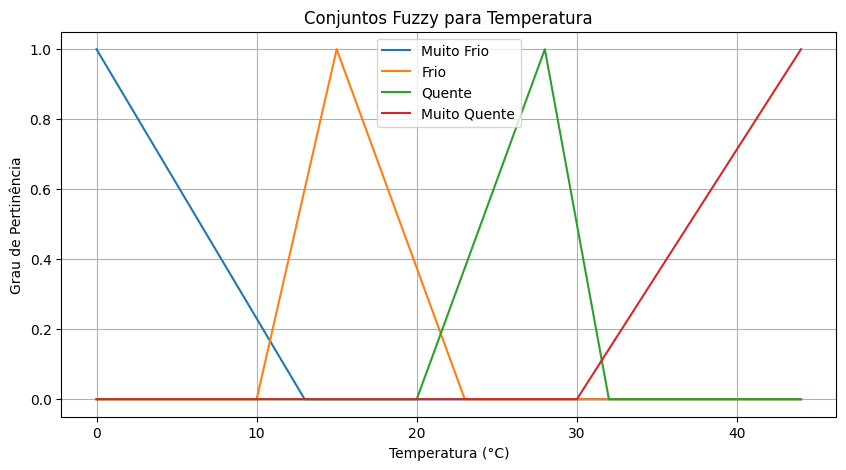

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Universo da variável temperatura
temperatura = np.arange(0, 45, 1)

# Definindo os conjuntos fuzzy
muito_frio = fuzz.trimf(temperatura, [0, 0, 13])
frio = fuzz.trimf(temperatura, [10, 15, 23])
quente = fuzz.trimf(temperatura, [20, 28, 32])
muito_quente = fuzz.trimf(temperatura, [30, 44, 44])

# Plotando os conjuntos
plt.figure(figsize=(10, 5))
plt.plot(temperatura, muito_frio, label='Muito Frio')
plt.plot(temperatura, frio, label='Frio')
plt.plot(temperatura, quente, label='Quente')
plt.plot(temperatura, muito_quente, label='Muito Quente')
plt.title('Conjuntos Fuzzy para Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grau de Pertinência')
plt.legend()
plt.grid(True)
plt.show()



## Lista de Exercicios
1.  Crie um sistema fuzzy que receba:

- Entrada 1: Temperatura (0 a 44 °C)

- Entrada 2: Umidade do solo (0 a 100%)

- Saída: Tempo de irrigação (0 a 60 minutos)

   Com as regras:

 - Se a umidade é baixa e a temperatura é alta, então o tempo de irrigação é longo.

 - Se a umidade é média e a temperatura é média, então o tempo de irrigação é médio.

 - Se a umidade é alta ou a temperatura é baixa, então o tempo de irrigação é curto.

-  Teste o sistema anterior com as entradas:

  - Temperatura = 32 °C, Umidade = 25%

  - Temperatura = 20 °C, Umidade = 80%

  - Temperatura = 28 °C, Umidade = 50%

  - Anote os tempos sugeridos.
<br>



2. Problemas: Sistema de Irrigação Automatizado – Custo x Benefício. Um produtor rural está avaliando se vale a pena instalar um sistema de irrigação automático com sensores e controle fuzzy. A decisão será baseada em dois fatores:

- Custo de Instalação (em R$)

- Ganho Esperado de Produção (em %)

 Objetivo:
  * Avaliar o nível de benefício da instalação com base fuzzy, considerando:

    - Quanto menor o custo e maior o ganho, maior o benefício.

    - Se o custo for alto e o ganho for pequeno, o benefício é baixo.

  * Variáveis fuzzy:

    - Entradas:

    - Custo (baixo, médio, alto) → R$0 a R$20.000

    - Ganho de Produção (baixo, médio, alto) → 0% a 50%

- Saída:

  - Benefício (baixo, médio, alto) → 0 a 100

<br>


3. Proponha um sistema fuzzy com pelo menos duas entradas e uma saída para
os seguintes contextos:
- Implemente o sistema proposto no exercício anterior usando skfuzzy e teste com diferentes entradas.

  4.1. Controle de iluminação automática

  4.2. Suporte ao diagnóstico médico

  4.3. Decisão de velocidade de um drone agrícola

  
<br>

4. Avaliação de Produtos por Custo-Benefício
 * Objetivo: Avaliar produtos com base em dois critérios:

    - Custo do produto

    - Qualidade percebida

- Saída Esperada:

  - Custo-benefício (baixo, médio, alto)

  <br>

  
 * Modelagem do Problema

  - Variáveis fuzzy:
    - Entradas:

      - Custo (R$): baixo, médio, alto → Ex: R$ 0 a R$ 500

      - Qualidade (0 a 10): ruim, razoável, boa

  - Saída:

    - Custo-benefício: baixo, médio, alto

  - Regras fuzzy:

    - Se o custo é baixo e a qualidade é boa, então o custo-benefício é alto

    - Se o custo é alto e a qualidade é ruim, então o custo-benefício é baixo

    - Se o custo é médio e a qualidade é razoável, então o custo-benefício é médio

    - Se a qualidade é boa, mesmo com custo médio, então o custo-benefício pode ser alto

    <br>

5. (Análise) Explique a vantagem da lógica fuzzy em ambientes com sensores que apresentam medições imprecisas ou ruidosas.


# FIM